In [1]:
# Heat flux Time Series
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
hs = 1
state01 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/state_' + str(format(hs,'03d')) + '.nc')
State = state01.isel(Y=range(30,39), X=range(1,120), Xp1=range(1,121))     
Grid01 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/grid_' + str(format(hs,'03d')) + '.nc')
Dif01 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/Dif_' + str(format(hs,'03d')) + '.nc')
adv = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/Adv_' + str(format(hs,'03d')) + '.nc')
Grid = Grid01.isel(X=range(120), Xp1=range(1,121), Y=range(30,39))
Adv = adv.isel(X=range(1,120), Y=range(30,39))

Xp = State.Xp1.data

In [ ]:
def heatflux_ts(file, xidx):
    Dif01 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat_high/Dif_' + str(format(file,'03d')) + '.nc')
    Adv01 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700_strat_high/Adv_' + str(format(file,'03d')) + '.nc')
    Dif = Dif01.isel(X=range(1,120), Xp1=range(1,121), Y=range(30,39))
    Adv = Adv01.isel(X=range(1,120), Xp1=range(1,121), Y=range(30,39))
    
    
    time = Adv.T.data / 86400
    Cp = 3994  # Specific heat content J/kg/C
    rho = 999.8 # Density
    
    advp = np.zeros(len(time)) # Positive advective heat flux
    advn = np.zeros(len(time)) # Negative advective heat flux
    difp = np.zeros(len(time)) # Positive diffusive heat flux
    difn = np.zeros(len(time)) # Negative diffusive heat flux
    
    for t in range(len(time)):
        advx = Adv.ADVx_TH.data[t,:,:,xidx] * Cp * rho
        difx = Dif.DFxE_TH.data[t,:,:,xidx] * Cp * rho
        
        advp[t] = advx[advx>0].sum()
        advn[t] = advx[advx<0].sum()
        
        difp[t] = difx[difx>0].sum()
        difn[t] = difx[difx<0].sum()
        
    return time, advp, advn

In [2]:
def flux_ts_maxhs(case_id, xidx):
    State01 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_maxhs/state_' + str(format(case_id,'03d')) + '.nc')
    Adv01 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_maxhs/Adv_' + str(format(case_id,'03d')) + '.nc')
    Grid01 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_maxhs/grid_' + str(format(case_id,'03d')) + '.nc')
    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    Adv = Adv01.isel(T=~Adv01.get_index("T").duplicated())
    
    state = State.isel(T=range(1,len(State.T)))
    areaW = Grid01.HFacW * Grid01.drF * Grid01.dyG # Z Y Xp1
    u = state.U.data
    
    time = Adv.T.data / 86400
    Cp = 3994  # Specific heat content J/kg/C
    rho = 999.8 # Density
    
    advp = np.zeros(len(time)) # Positive advective heat flux
    advn = np.zeros(len(time)) # Negative advective heat flux
    Qp = np.zeros(len(time)) # Positive diffusive heat flux
    Qn = np.zeros(len(time)) # Negative diffusive heat flux
    
    for t in range(len(time)):
        advx = Adv.ADVx_TH.data[t,:,:,xidx] * Cp * rho
        Qx = state.U.data[t,:,:,xidx] * areaW.data[:,:,xidx]
        
        advp[t] = advx[advx>0].sum()
        advn[t] = advx[advx<0].sum()
        
        Qp[t] = Qx[Qx>0].sum()
        Qn[t] = Qx[Qx<0].sum()
        
    return time, advp, advn, Qp, Qn

In [3]:
def flux_ts_minhs(case_id, xidx):
    State01 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs/state_' + str(format(case_id,'03d')) + '.nc')
    Adv01 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs/Adv_' + str(format(case_id,'03d')) + '.nc')
    Grid01 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs/grid_' + str(format(case_id,'03d')) + '.nc')
    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    Adv = Adv01.isel(T=~Adv01.get_index("T").duplicated())
    
    state = State.isel(T=range(1,len(State.T)))
    areaW = Grid01.HFacW * Grid01.drF * Grid01.dyG # Z Y Xp1
    u = state.U.data
    
    time = Adv.T.data / 86400
    Cp = 3994  # Specific heat content J/kg/C
    rho = 999.8 # Density
    
    advp = np.zeros(len(time)) # Positive advective heat flux
    advn = np.zeros(len(time)) # Negative advective heat flux
    Qp = np.zeros(len(time)) # Positive diffusive heat flux
    Qn = np.zeros(len(time)) # Negative diffusive heat flux
    
    for t in range(len(time)):
        advx = Adv.ADVx_TH.data[t,:,:,xidx] * Cp * rho
        Qx = state.U.data[t,:,:,xidx] * areaW.data[:,:,xidx]
        
        advp[t] = advx[advx>0].sum()
        advn[t] = advx[advx<0].sum()
        
        Qp[t] = Qx[Qx>0].sum()
        Qn[t] = Qx[Qx<0].sum()
        
    return time, advp, advn, Qp, Qn

In [ ]:
a, b, c, d, e = flux_ts(2,6)
a, b, c, d, e

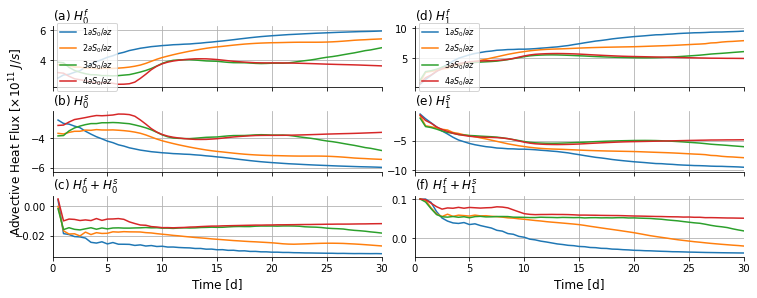

In [4]:
case = np.array([1,2,3,4])
f, s = 6, 120

fig2 = plt.figure(figsize=(12,4))
#fig2.tight_layout()
ax1 = fig2.add_subplot(321)
ax1.set_xlim([0, 30])
ax1.set_title(r'(a) $H_0^f$', loc='left', size=12)
#ax1.xaxis.set_visible(False)
#ax1.set_ylabel('Heat Flux [J/s]', size=15)
ax1.grid(True)
ax1.set_xticklabels([])
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax2 = fig2.add_subplot(323)
ax2.set_xlim([0, 30])
ax2.set_title(r'(b) $H_0^s$', loc='left', size=12)
ax2.set_ylabel(r'Advective Heat Flux [$\times 10^{11}\;J/s$]', size=12)
ax2.grid(True)
ax2.set_xticklabels([])
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax3 = fig2.add_subplot(325)
ax3.set_xlim([0, 30])
ax3.set_title(r'(c) $H_0^f+H_0^s$', loc='left', size=12)
ax3.set_xlabel('Time [d]', size=12)
#ax3.set_ylabel('Heat Flux [J/s]', size=15)
ax3.grid(True)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)


ax4 = fig2.add_subplot(322)
ax4.set_xlim([0, 30])
ax4.set_title(r'(d) $H_1^f$', loc='left', size=12)
#ax1.xaxis.set_visible(False)
#ax1.set_ylabel('Heat Flux [J/s]', size=15)
ax4.grid(True)
ax4.set_xticklabels([])
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)

ax5 = fig2.add_subplot(324)
ax5.set_xlim([0, 30])
ax5.set_title(r'(e) $H_1^s$', loc='left', size=12)
#ax5.set_ylabel(r'Advective Heat Flux [$\times 10^{11}\;J/s$]', size=12)
ax5.grid(True)
ax5.set_xticklabels([])
ax5.spines["top"].set_visible(False)
ax5.spines["right"].set_visible(False)

ax6 = fig2.add_subplot(326)
ax6.set_xlim([0, 30])
ax6.set_title(r'(f) $H_1^f+H_1^s$', loc='left', size=12)
ax6.set_xlabel('Time [d]', size=12)
#ax3.set_ylabel('Heat Flux [J/s]', size=15)
ax6.grid(True)
ax6.spines["top"].set_visible(False)
ax6.spines["right"].set_visible(False)


for i in range(len(case)):
    dd1, Hp1, Hn1, Qp1, Qn1 = flux_ts_maxhs(case[i],f)
    ax1.plot(dd1,Hp1/1e11,label=str(i+1)+r'$\partial S_0 / \partial z$')
    ax1.legend(loc='center left',fontsize=8)
    ax2.plot(dd1,Hn1/1e11,label=r's'+str(i))
    #ax2.legend()
    ax3.plot(dd1,(Hp1+Hn1)/1e11,label=r's'+str(i))
    
    
    dd2, Hp2, Hn2, Qp2, Qn2 = flux_ts_maxhs(case[i],s)
    ax4.plot(dd2,Hp2/1e11,label=str(i+1)+r'$\partial S_0 / \partial z$')
    ax4.legend(loc='center left',fontsize=8)
    ax5.plot(dd2,Hn2/1e11,label=r's'+str(i))
    ax6.plot(dd2,(Hp2+Hn2)/1e11,label=r's'+str(i))
    
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.4)
 

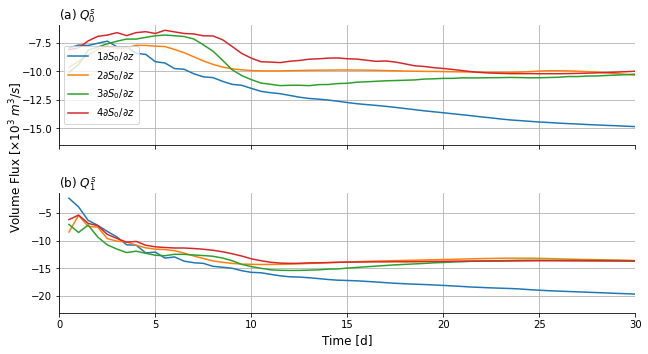

In [7]:
case = np.array([1,2,3,4])
#f, s = 6, 235

fig3 = plt.figure(figsize=(10,5))
#fig2.tight_layout()
ax1 = fig3.add_subplot(211)
ax1.set_xlim([0, 30])
ax1.set_title(r'(a) $Q_0^s$', loc='left', size=12)
#ax1.xaxis.set_visible(False)
ax1.set_ylabel(r'Volume Flux [$\times 10^3\;m^3/s$]', size=12)
ax1.yaxis.set_label_coords(-0.06, -0.1)
ax1.grid(True)
ax1.set_xticklabels([])
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax2 = fig3.add_subplot(212)
ax2.set_xlim([0, 30])
ax2.set_title(r'(b) $Q_1^s$', loc='left', size=12)

ax2.set_xlabel('Time [d]', size=12)

ax2.grid(True)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)


for i in range(len(case)):
    ddf, Hpf, Hnf, Qpf, Qnf = flux_ts_minhs(case[i],f)
    ax1.plot(ddf,Qnf/1e3,label=str(i+1)+r'$\partial S_0 / \partial z$')
    ax1.legend(loc='center left',fontsize=10)
    
    dds, Hps, Hns, Qps, Qns = flux_ts_minhs(case[i],s)
    ax2.plot(dds,Qns/1e3,label=r's'+str(i))
    
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
 

In [ ]:
prof = np.array([1,2,3,4])
hsr = np.array([9, 12, 15, 18]) / 150
xi = 47
fig1 = plt.figure(figsize=(15,9))
fig1.tight_layout()

ax1 = fig1.add_subplot(311)
#ax1.axvline(x=4.8, color='k',lw=1.5,ls='--')
ax1.set_xlim([0, 30])
ax1.set_title(r'(a) Down fjord', loc='center', size=15)
#ax1.xaxis.set_visible(False)
#ax1.set_ylabel('Heat Flux [J/s]', size=15)
ax1.grid(True)
ax1.set_xticklabels([])
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)



ax2 = fig1.add_subplot(312)
ax2.set_xlim([0, 30])
ax2.set_title(r'(b) Up fjord', loc='center', size=15)
ax2.set_ylabel('Advective Heat Flux [J/s]', size=15)
ax2.grid(True)
ax2.set_xticklabels([])
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax3 = fig1.add_subplot(313)
ax3.set_xlim([0, 30])
ax3.set_title(r'(c) Net', loc='center', size=15)
ax3.set_xlabel('Time [d]', size=15)
#ax3.set_ylabel('Heat Flux [J/s]', size=15)
ax3.grid(True)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

for i in range(len(prof)):
    ot, advhp, advhn = heatflux_ts(prof[i],xi)
    
    ax1.plot(ot, advhp, lw=2, label=str(hsr[i]))
    ax1.legend(title=r'$h_s/h$', loc='right', fontsize=12)
    
    ax2.plot(ot, advhn, lw=2, label=str(hsr[i]))
    ax2.legend(title=r'$h_s/h$', loc='right', fontsize=12)
    
    ax3.plot(ot, advhp+advhn, lw=2, label=str(hsr[i]))
    ax3.legend(title=r'$h_s/h$', loc='right', fontsize=12)

print(Xp[xi])

In [ ]:
Xp[3], Xp[47], Xp[71]

In [8]:
#fig_path = "/Users/weiyangbao/Documents/Results_Figs/FjordCirculation/"
fig_path = "/home/1959/Jupyter_Figs/Parameters/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig2.savefig(fig_path + '/Sz_Heat.png', dpi=200, bbox_inches='tight')
fig3.savefig(fig_path + '/Sz_Vol.png', dpi=200, bbox_inches='tight')